## word2vec method for CDR3

create a file containing only the AA strings from the CFR3 fasta file

In [251]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt


In [255]:
file = 'fasta_files/CDR3_from_HCV.fa'
outfile = 'fasta_files/CDR3_fom_HCV_cropped_words.txt'
with open(file, 'r') as fin, open(outfile, 'w') as fout:
    for line in fin:
        if not(line.startswith('>')):
            fout.write(line[2:-1]+'\n') #remove 1st 2 letters and last letter   
 

ERROR:root:Line magic function `%outfile.head` not found.


The following code is the training part, we use the fasta file that contains many sequences of AA's and train our model (the sequences are devided to n-grams of 3)

In [47]:
%cd /home/miri-o/Documents/
import biovec
CDR3_filename = 'fasta_files/CDR3_from_HCV.fa'
CDR3modelfilename = 'CDR3_based_model.txt'
trained_model = biovec.ProtVec(CDR3_filename, out=CDR3modelfilename)
trained_model.save('CDR3_model')



/home/miri-o/Documents
Generate Corpus file from fasta file...


........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

In [4]:
# load the model
%cd /home/miri-o/Documents/
import biovec
pv2 = biovec.models.load_protvec('CDR3_model')

/home/miri-o/Documents


let's take 1000 random examples, create their vectors, and plot them in 2D:

In [3]:
import numpy as np
lines = open(outfile).read().splitlines()
randlines = np.random.choice(lines,1000)
    

now randvectors contains a 100 length vector for each random word. let's use PCA to check if we can reduce the dimensions of the vector.

In [5]:
# let's see the same 1000 words with this model 


randvectors_word2vec = np.zeros((1000,100))
for i in range(len(randlines)):
    line = randlines[i]
    randvectors_word2vec[i] = list(pv2.to_vecs(line)[0])


In [6]:
from sklearn.decomposition import PCA

pca_word2vec = PCA(n_components=10)
pca_result_word2vec = pca_word2vec.fit_transform(randvectors_word2vec)

print('Explained variation per principal component: '+format(pca_word2vec.explained_variance_ratio_))


Explained variation per principal component: [ 0.09490975  0.05087654  0.03974427  0.03063017  0.02642434  0.02214933
  0.02163579  0.01844923  0.01790237  0.01684899]


Not the best result, but I'll continue with it

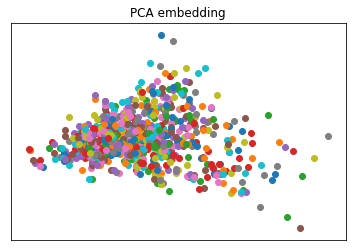

In [30]:
plot_embedding(pca_result_word2vec, title = 'PCA embedding')
plt.show()

In [12]:
# Let's try tSNE instead of PCA

vec_embedded = TSNE(n_components=2, init = 'pca', random_state =0).fit_transform(randvectors_word2vec)


In [24]:
def plot_embedding(X, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure()
    plt.xticks([]), plt.yticks([])
    for i in range(X.shape[0]):
        plt.scatter(X[i, 0], X[i, 1])
    if title is not None:
        plt.title(title)


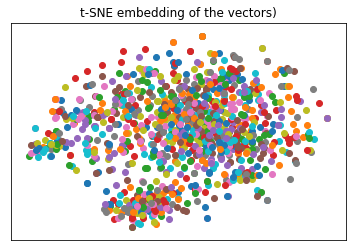

In [26]:
plot_embedding(vec_embedded,
               "t-SNE embedding of the vectors)")
plt.show()

#### Now let's color the plots according to their bio-chemical and bio-phusical properties - extracted by Alakazam package in R

In [33]:
file_with_propeties = pd.read_csv('CDR3_properties_HCV.csv')
file_with_propeties.head()

,Unnamed: 0,X,Unnamed..0,index,Unnamed..0.1,SEQUENCE_ID,SEQUENCE_INPUT,FUNCTIONAL,IN_FRAME,STOP,...,VJL,CDR3_AA_LENGTH,CDR3_AA_GRAVY,CDR3_AA_BULK,CDR3_AA_ALIPHATIC,CDR3_AA_POLARITY,CDR3_AA_CHARGE,CDR3_AA_BASIC,CDR3_AA_ACIDIC,CDR3_AA_AROMATIC
0,1,0,0,0,0,AACTGTAAGATACACTA,GCTTTCTGAGAGTCATGGATCTCATGTGCAAGAAAATGAAGCACCT...,True,True,False,...,IGHV4-39*IGHJ4*39,11,-0.554545,13.468182,0.445455,8.163636,-0.077262,0.090909,0.090909,0.181818
1,2,1,1,1,1,CTTATAGTCATTAAATA,AGCTCTGGGAGAGGAGCCCAGCACTAGAAGTCGGCGGTGTTTCCAT...,True,True,False,...,IGHV3-30*IGHJ4*48,14,-1.771429,10.337143,0.071429,10.078571,-2.888734,0.142857,0.285714,0.142857
2,3,3,3,3,3,TGCCTTGGCCCTTATTT,GAGATCTCAGAGAGGAGCCTTAGCCCTGGACTCCAAGGCCTTTCCA...,True,True,False,...,IGHV3-11*IGHJ2*36,10,-0.680000,15.822000,0.490000,8.520000,-0.001375,0.200000,0.200000,0.300000
3,4,4,4,5,5,GATATTCGATATATAAT,AGCTCTGAGAGAGGAGCCCAGCCCTGGGATTTTCAGGTGTTTTCAT...,True,True,False,...,IGHV3-23*IGHJ4*57,17,-0.764706,13.157059,0.458824,8.676471,-0.005748,0.117647,0.117647,0.235294
4,5,5,5,6,6,CTAATAAATCGTTATTA,GAGCTCTCAGAGAGGTGCCTTAGCCCTGGATTCCAAGGCATTTCCA...,True,True,False,...,IGHV3-48*IGHJ4*54,16,-0.868750,14.255625,0.368750,8.506250,0.993936,0.125000,0.062500,0.250000


In [205]:

len(lines)

1295479

In [206]:
file_with_propeties = file_with_propeties[file_with_propeties['JUNCTION'].str.find('-')==(-1)]
file_with_propeties = file_with_propeties[file_with_propeties['JUNCTION'].str.find('.')==(-1)]
len(file_with_propeties)

1313082

In [199]:
random_indexes = np.random.choice(range(len(file_with_propeties['JUNC_AA'])),1000)
randvectors_word2vec = np.zeros((1000,100))
index = 0
for i in random_indexes :
    word = file_with_propeties['JUNC_AA'][i]
    randvectors_word2vec[index] = list(pv2.to_vecs(word)[0])
    index+=1

#randvectors_word2vec[0]
vec_embedded = TSNE(n_components=2, init = 'pca', random_state =0).fit_transform(randvectors_word2vec)

In [224]:
def plot_embedding_with_properties(X, prop,title=None):


    x = [X[i,0] for i in range(len(X))]
    y = [X[i,1] for i in range(len(X))]


    plt.scatter(x, y, c=prop, s=20,cmap='plasma', alpha = .5)
    
    if title is not None:
        plt.title(title)
    plt.show()
    #plt.colorbar()
    

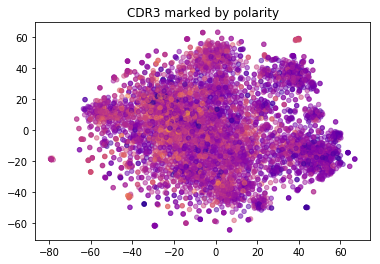

In [225]:
polarity = file_with_propeties['CDR3_AA_POLARITY'][random_indexes]
polarity = np.array([(c - min(polarity))/(max(polarity)-min(polarity))*100 for c in polarity])
plot_embedding_with_properties(vec_embedded, polarity, title='CDR3 marked by polarity')

In [244]:
import seaborn as sns
# data = polarity, x,y are from PCA
sns.jointplot(x = 'CDR3_AA_POLARITY', y = 'CDR3_AA_CHARGE' , kind = 'kde', data = file_with_propeties)
plt.show()

KeyboardInterrupt: 

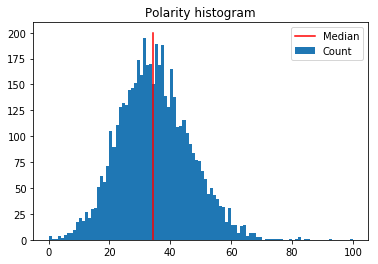

In [213]:
import statistics
med = statistics.median(polarity)
plt.hist(polarity, bins=100)
plt.plot([med, med], [0,200], 'r')
plt.title('Polarity histogram')
plt.legend(['Median', 'Count'])
plt.show()

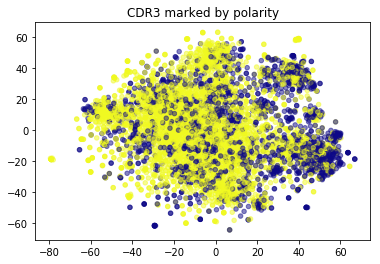

In [248]:
polarity_bin= [1 if i<30 else 2 for i in polarity]
plot_embedding_with_properties(vec_embedded, polarity_bin, title='CDR3 marked by polarity')

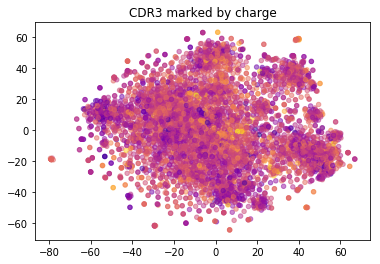

In [243]:
charge = file_with_propeties['CDR3_AA_CHARGE'][random_indexes]

charge = np.array([(c - min(charge))/(max(charge)-min(charge))*100 for c in charge])
plot_embedding_with_properties(vec_embedded, charge, title='CDR3 marked by charge')

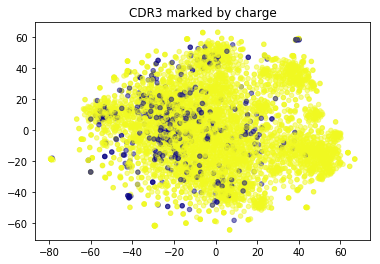

In [250]:
charge_bin= [1 if i>statistics.median(charge) else 2 for i in polarity]
plot_embedding_with_properties(vec_embedded, charge_bin, title='CDR3 marked by charge')

In [57]:
n = len(file_with_propeties['JUNC_VEC'])-1
junVec4PCA = [[col[0][row] for row in range(100)] for col in file_with_propeties['JUNC_VEC']] #each column is a 100 length vector
#junVec4PCA = list(map(list, zip(*file_with_propeties['JUNC_VEC'])))


#### for n = 5000 points:

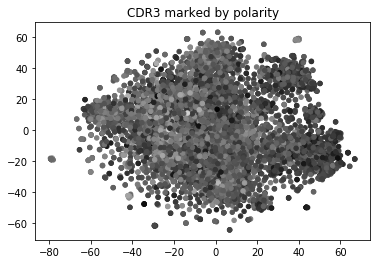

In [204]:
#lets try to take more points and do the same
n = 5000
random_indexes = np.random.choice(range(len(file_with_propeties['JUNC_AA'])),n)
randvectors_word2vec = np.zeros((n,100))
index = 0
for i in random_indexes :
    word = file_with_propeties['JUNC_AA'][i]
    randvectors_word2vec[index] = list(pv2.to_vecs(word)[0])
    index+=1

#randvectors_word2vec[0]
vec_embedded = TSNE(n_components=2, init = 'pca', random_state =0).fit_transform(randvectors_word2vec)

polarity = file_with_propeties['CDR3_AA_POLARITY'][random_indexes]
polarity = np.array([(c - min(polarity))/(max(polarity)-min(polarity))*100 for c in polarity])
plot_embedding_with_properties(vec_embedded, polarity, title='CDR3 marked by polarity')

## Fasttext model

In [40]:
import fasttext 
# Skipgram model
model = fasttext.skipgram(outfile, 'model')
print(model.words) # list of words in dictionary

{'CAKNGGWYGRGWFDPW', 'CARDQEMGTPKEVLDYW', 'CAHKGTGWFSGVGFDYW', 'CARGRYYYDRSSYHGDYW', 'CARGGYSGHDPEYHFDSW', 'CAKRGYYDRGGYYLFEYW', 'CAREQDVRSPPRGIDYW', 'CARGPMIVVVNWFDPW', 'CARGVRDYYTFTAFYGGEERRPSPGHYFDSW', 'CARAIARTGLGHYFDNW', 'CVKGYNWIDPPFDDW', 'CARGRVPGGDQLFDNW', 'CARDPGGWYFDLW', 'CATPRGDGRFHHYAMDVW', 'CARETERGPVDYGGKPFGYW', 'CASEGMLTGRFDFW', 'CATSYYDIILPLIPW', 'CVRGGLSYADLW', 'CATGETEDYW', 'CAKDPFEYSSSSSFDYW', 'CAREEISGYDYFDYW', 'CAKTYDSSGYPFDHW', 'CARGDQGYQDYYYYYMDVW', 'CARDLTYCGDHCYSFFDYW', 'CVRDDNSGYQDRGHW', 'CGGGVNKSYDYW', 'CAKERLGDYVADYW', 'CAGARAPGDLPREGYW', 'CVRVGFGSGWIE', 'CAHSRFYGDSTLDYW', 'CAKSPREVDYW', 'CVHRPEGSGSYYDFW', 'CASSLWGSAAFDSW', 'CAKTHGGAYYFPDYW', 'CARLLLGRYYDPRRDYW', 'CTTDKESWMILFSYW', 'CASGPYYSDPRGHSYASIDYW', 'CARAMGVAAPSDLW', 'CSRRHKDYYYHHDMDVW', 'CAKGLGVAAGGSGGLLDMW', 'CSHRPPIAAKGGAFAIW', 'CARGRFSARKSNHRMDVW', 'CARWRIFAKFDYW', 'CAHSGLARRTFDIW', 'CAHRRSPGLLFDFW', 'CARGVRSRYSTSCFDYW', 'CAREAGYTYGFDYW', 'CARHIGLYSGKYTHW', 'CARAVSMPGAPFDVW', 'CARSGSGSELGIFDYW', '

In [41]:
# a vector of a word not in the dictionary
print(model['CATWSWSW'])

[-0.6827042102813721, -0.5844817161560059, 0.7233783602714539, -0.5533134341239929, 0.4595399796962738, 0.05009455978870392, -0.02542252279818058, -0.060615863651037216, -0.23638540506362915, -0.24110352993011475, -0.40991175174713135, -0.5790672302246094, 0.9304267764091492, -0.4156300723552704, -0.0045095691457390785, 0.6179961562156677, 0.6621968150138855, -0.025952007621526718, 0.5381392240524292, -0.7822141051292419, -0.30476614832878113, -0.24931320548057556, 0.3534460663795471, 0.7591189742088318, -1.1684092283248901, -0.5904881358146667, -0.6678783297538757, 0.8292754292488098, -0.43305182456970215, 0.10784191638231277, 0.3992179036140442, -0.47520822286605835, -1.2446815967559814, -1.758484125137329, 0.004714200273156166, 0.11462853848934174, 0.7072195410728455, -0.43075940012931824, 0.2141621708869934, -0.721608579158783, 0.31506630778312683, -1.0595848560333252, 1.811233639717102, 0.6740326285362244, -0.7618331909179688, 0.95377117395401, 0.30514898896217346, 0.6065376400947

In [ ]:
randvectors = np.zeros((1000,100))
for i in range(len(randlines)):
    line = randlines[i]
    randvectors[i] = model[line]
